In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=2200

In [2]:
data = pd.read_csv('Insurance claims data.csv')
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [3]:
data.shape

(58592, 41)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

The data has both numeric and object columns , the object columns are the majority

# Missing values

In [5]:
percent_missing=data.isnull().sum()*100/len(data)
missing_value = pd.DataFrame({'column_name':data.columns,'percent_missing':percent_missing})
missing_value

,column_name,percent_missing
policy_id,policy_id,0.0
subscription_length,subscription_length,0.0
vehicle_age,vehicle_age,0.0
customer_age,customer_age,0.0
region_code,region_code,0.0
region_density,region_density,0.0
segment,segment,0.0
model,model,0.0
fuel_type,fuel_type,0.0
max_torque,max_torque,0.0


No missing value wow

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
subscription_length,58592.0,6.111688,4.142790,0.0,2.1,5.7,10.4,14.0
vehicle_age,58592.0,1.388473,1.134413,0.0,0.4,1.2,2.2,20.0
customer_age,58592.0,44.823935,6.935604,35.0,39.0,44.0,49.0,75.0
region_density,58592.0,18826.858667,17660.174792,290.0,6112.0,8794.0,27003.0,73430.0
airbags,58592.0,3.137066,1.832641,1.0,2.0,2.0,6.0,6.0
displacement,58592.0,1162.355851,266.304786,796.0,796.0,1197.0,1493.0,1498.0
cylinder,58592.0,3.626963,0.483616,3.0,3.0,4.0,4.0,4.0
turning_radius,58592.0,4.852893,0.228061,4.5,4.6,4.8,5.0,5.2
length,58592.0,3850.476891,311.457119,3445.0,3445.0,3845.0,3995.0,4300.0
width,58592.0,1672.233667,112.089135,1475.0,1515.0,1735.0,1755.0,1811.0


Some of the data contains outliers as shown in the difference between the 75 percentile and the max

# Categorical columns

Lets dive in into the object columns and int columns that act like categorical columns

In [7]:
data.apply(lambda x: len(x.unique()))

policy_id                           58592
subscription_length                   140
vehicle_age                            49
customer_age                           41
region_code                            22
region_density                         22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
steering_type                           3
turning_radius                    

# Levels In the Categorical Data with a lot of classes

In [8]:
data['region_code'].value_counts()


C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: region_code, dtype: int64

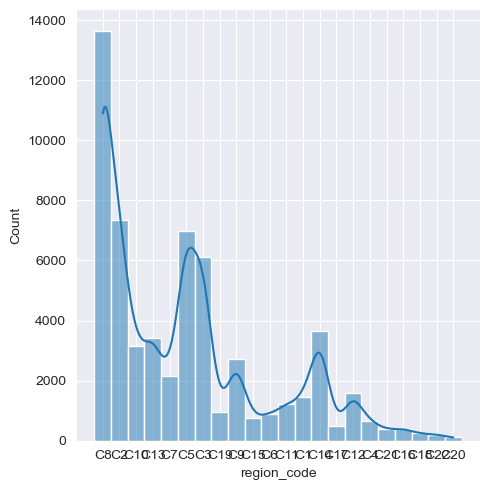

In [9]:
sns.displot(data['region_code'],kde=True)

In [10]:
data['region_density'].value_counts()

8794     13654
27003     7342
34738     6979
4076      6101
7788      3660
5410      3423
73430     3155
17804     2734
6112      2167
34791     1589
4990      1468
6108      1212
27742      952
13051      890
290        771
21622      665
65567      492
16206      401
3264       379
35036      242
16733      207
20905      109
Name: region_density, dtype: int64

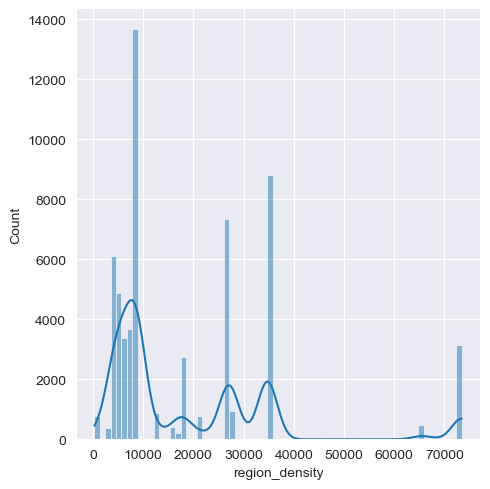

In [11]:
sns.displot(data['region_density'],kde=True)

We can bin this into three classes ie high_density,medium_density and low density 

In [12]:
def density_bins(x):
    if x > 0 and x <=5000:
        return 'Low_density'
    elif x > 5000 and x <=10000:
        return 'Medium_density'
    elif x > 10000:
        return 'High_density'
data['density_bins']=  data['region_density'].apply(density_bins) 
data['density_bins'].value_counts()

High_density      25757
Medium_density    24116
Low_density        8719
Name: density_bins, dtype: int64

In [13]:
data['segment'].value_counts()

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64

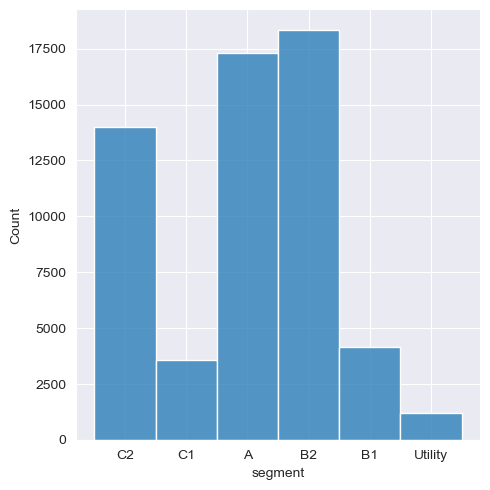

In [14]:
sns.displot(data['segment'])

B2,A and C2 are way higher than the rest lets group the data into two ie major and minor segments

In [15]:
#major and minor segments
def segment_bins(x):
    if x in {'B2', 'A', 'C2'}:
        return 'Major_segment'
    elif x in {'B1', 'C1', 'Utility'}:
        return 'Minor_segment'
    
data['Segment_bins'] = data['segment'].apply(segment_bins)
print(data['Segment_bins'].value_counts())

    

Major_segment    49653
Minor_segment     8939
Name: Segment_bins, dtype: int64


In [16]:
data['model'].value_counts()

M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64

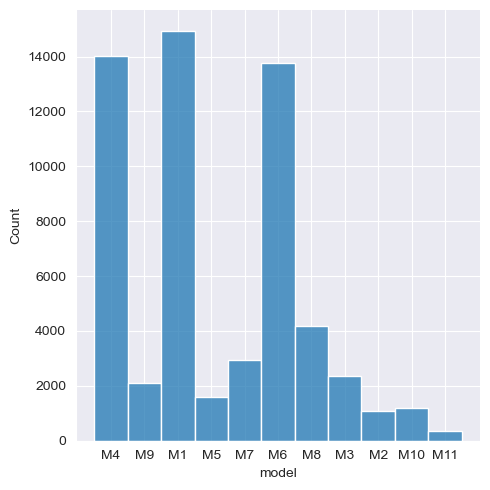

In [17]:
sns.displot(data['model'])

Two many classes lets group them into popular and unpopular models

In [18]:
def model_pop(x):
    if x in {'M1','M4','M6'}:
        return 'Popular_model'
    elif x in {'M9','M5','M7','M8','M3','M2','M10','M11'}:
        return 'Unpopular_model'
data['model_pop']=  data['model'].apply(model_pop)
data['model_pop'].value_counts()

Popular_model      42742
Unpopular_model    15850
Name: model_pop, dtype: int64

In [19]:
data['max_torque'].value_counts()

113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

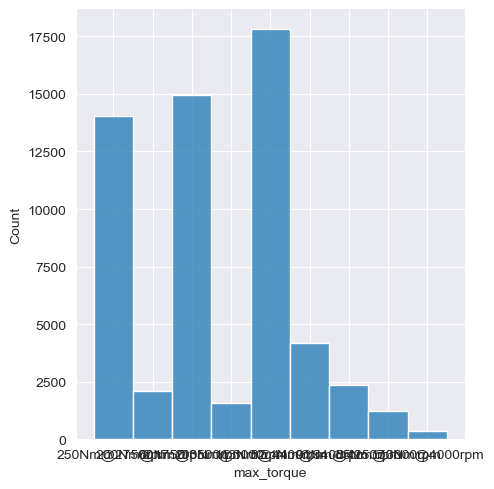

In [20]:
sns.displot(data['max_torque'])

We will also bin this into two groups

In [21]:
def Pop_max_torque(x):
    if x in {'113Nm@4400rpm','60Nm@3500rpm','250Nm@2750rpm'}:
        return 'Popular_max_torque'
    else:
        return 'Unpopular_max_torque'
data['Pop_max_torque']=  data['max_torque'].apply(Pop_max_torque)
data['Pop_max_torque'].value_counts()

Popular_max_torque      46762
Unpopular_max_torque    11830
Name: Pop_max_torque, dtype: int64

In [22]:
data['max_power'].value_counts()

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

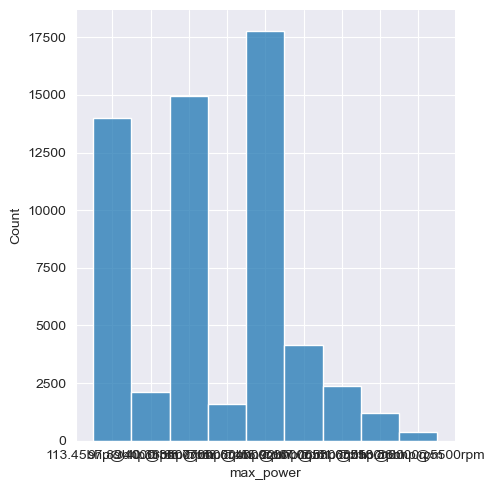

In [23]:
sns.displot(data['max_power'])

We can also bin this into two

In [24]:
def level_max_power(x):
    if x in {'88.50bhp@6000rpm','40.36bhp@6000rpm','113.45bhp@4000rpm'}:
        return 'High_max_power'
    else:
        return 'Low_max_power'
data['level_max_power']=data['max_power'].apply(level_max_power) 
data['level_max_power'].value_counts()


High_max_power    46762
Low_max_power     11830
Name: level_max_power, dtype: int64

In [25]:
data['engine_type'].value_counts()

F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64

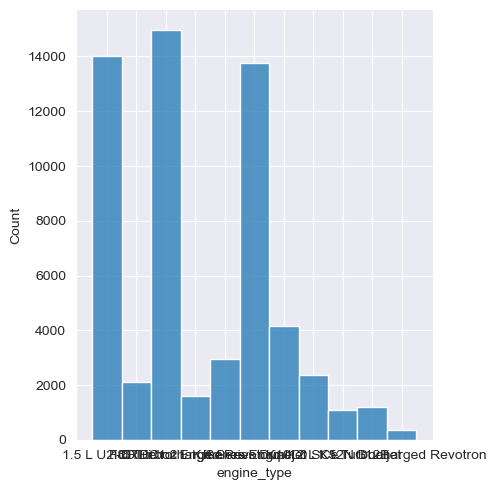

In [26]:
sns.displot(data['engine_type'])

In [27]:
def Popular_engine_type(x):
    if x in {'F8D Petrol Engine','1.5 L U2 CRDi','K Series Dual jet'}:
        return 'Most_engine_type'
    else:
        return 'least_engine_type'
data['Popular_engine_type']=data['engine_type'].apply(Popular_engine_type) 
data['Popular_engine_type'].value_counts()


Most_engine_type     42742
least_engine_type    15850
Name: Popular_engine_type, dtype: int64

In [28]:
data['airbags'].value_counts()

2    40425
6    16958
1     1209
Name: airbags, dtype: int64

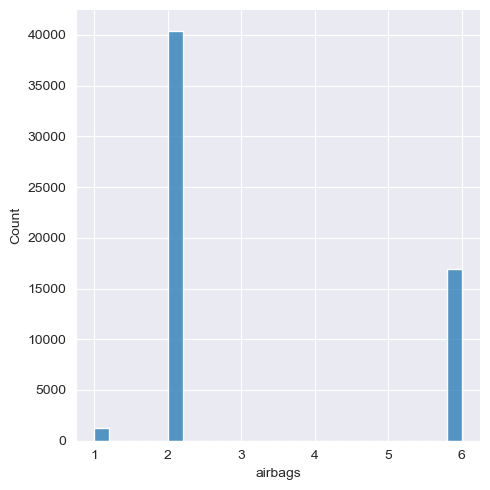

In [29]:
sns.displot(data['airbags'])

In [30]:
data['displacement'].value_counts()

1197    17796
796     14948
1493    14018
998      4173
999      2373
1498     2114
1497     1598
1196     1209
1199      363
Name: displacement, dtype: int64

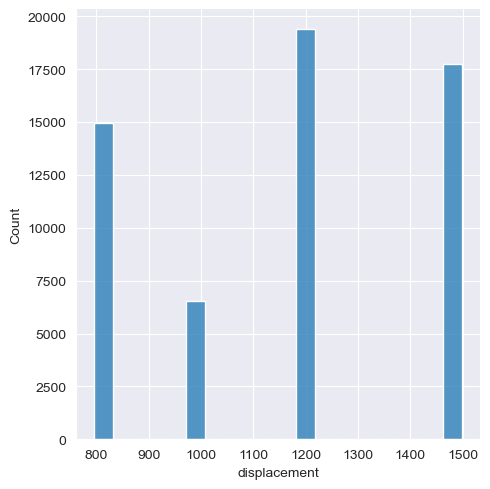

In [31]:
sns.displot(data['displacement'])

In [32]:
def level_displacement(x):
    if x <=1000:
        return 'low_displacement'
    elif x >1000:
        return 'High_displacement'
data['level_displacement']=data['displacement'].apply(level_displacement)  
data['level_displacement'].value_counts()


High_displacement    37098
low_displacement     21494
Name: level_displacement, dtype: int64

In [33]:
data['turning_radius'].value_counts()

4.60    14948
4.80    14856
5.20    14018
4.70     4173
5.00     3971
4.85     2940
4.90     2114
4.50     1209
5.10      363
Name: turning_radius, dtype: int64

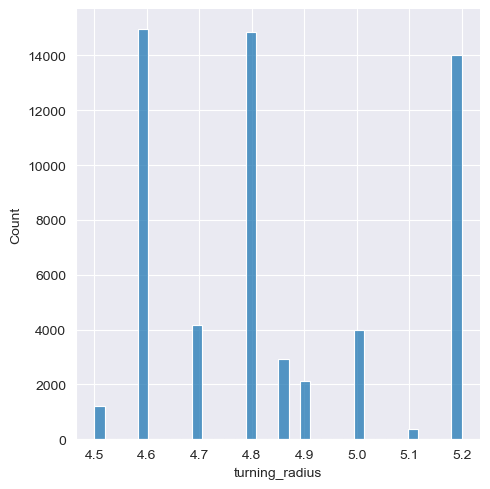

In [34]:
sns.displot(data['turning_radius'])

In [35]:
def size_tuning_radius(x):
    if x >= 4.50 and x < 5.00:
        return 'small_tuning_radius'
    elif x >= 5.00:
        return 'large_tuning_radius'
data['size_tuning_radius']=data['turning_radius'].apply(size_tuning_radius)  
data['size_tuning_radius'].value_counts()


small_tuning_radius    40240
large_tuning_radius    18352
Name: size_tuning_radius, dtype: int64

In [36]:
data['length'].value_counts()

3445    14948
4300    14018
3845    13776
3990     4538
3655     4173
3995     3194
3731     2373
3675     1209
3993      363
Name: length, dtype: int64

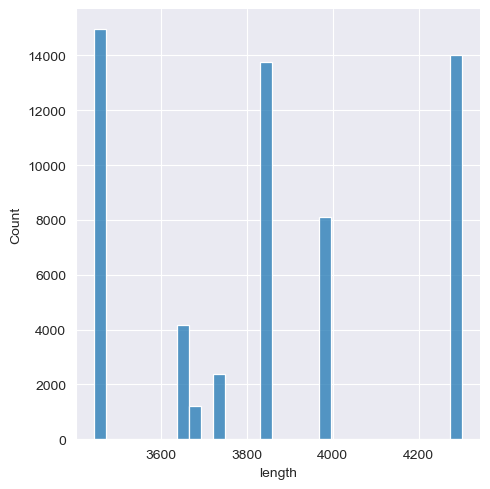

In [37]:
sns.displot(data['length'])

In [38]:
def length_cat(x):
    if x < 3600:
        return 'short'
    elif x >= 3600:
        return 'long'
data['length_cat']=data['length'].apply(length_cat)  
data['length_cat'].value_counts()


long     43644
short    14948
Name: length_cat, dtype: int64

In [39]:
data['width'].value_counts()

1515    14948
1735    14856
1790    14018
1620     4173
1745     2940
1579     2373
1695     2114
1755     1598
1475     1209
1811      363
Name: width, dtype: int64

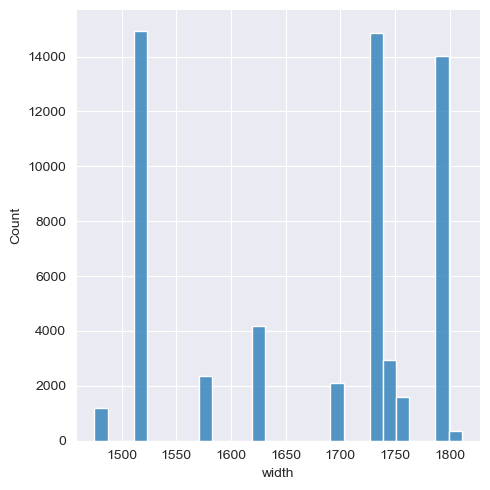

In [40]:
sns.displot(data['width'])

In [41]:
def size_width(x):
    if x >= 1500 and x < 1650:
        return 'wide'
    elif x >= 1650:
        return 'wider'
data['size_width']=data['width'].apply(size_width)  
data['size_width'].value_counts()


wider    35889
wide     21494
Name: size_width, dtype: int64

In [42]:
data['gross_weight'].value_counts()

1185    14948
1335    14856
1720    14018
1340     4173
1410     2940
1155     2373
1051     2114
1490     1598
1510     1209
1660      363
Name: gross_weight, dtype: int64

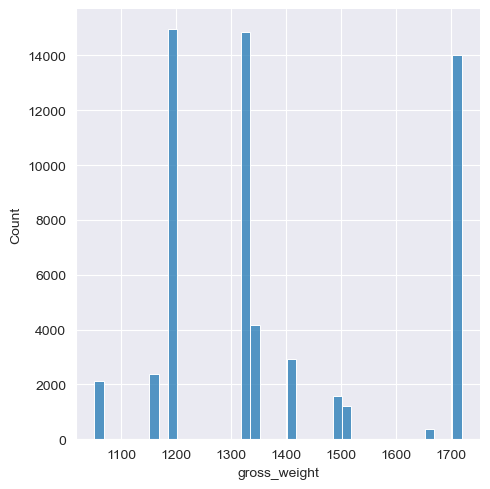

In [43]:
sns.displot(data['gross_weight'])

In [44]:
def weight_cat(x):
    if x >= 1000 and x < 1500:
        return 'heavy'
    elif x >= 1500:
        return 'heavier'
data['weight_cat']=data['gross_weight'].apply(weight_cat)  
data['weight_cat'].value_counts()

heavy      43002
heavier    15590
Name: weight_cat, dtype: int64

In [45]:
data['ncap_rating'].value_counts()

2    21402
0    19097
3    14018
4     2114
5     1961
Name: ncap_rating, dtype: int64

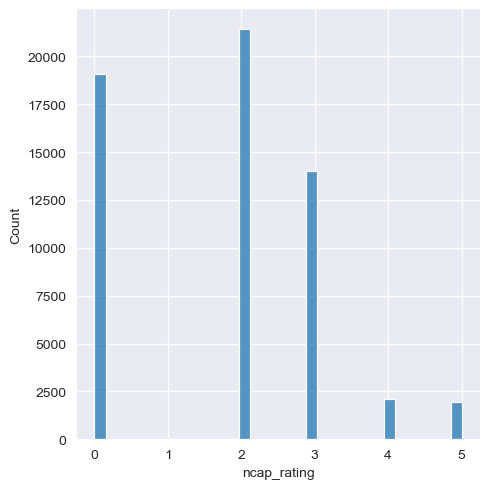

In [46]:
sns.displot(data['ncap_rating'])

In [47]:
def rating_cat(x):
    if x >= 0 and x <=2:
        return 'Poor_rating'
    elif x == 3:
        return 'average_rating'
    elif x > 3:
        return 'good_rating'
data['rating_cat']=data['ncap_rating'].apply(rating_cat)  
data['rating_cat'].value_counts()

Poor_rating       40499
average_rating    14018
good_rating        4075
Name: rating_cat, dtype: int64

In [48]:
object_columns = data.select_dtypes(include='object').columns

print(object_columns)

Index(['policy_id', 'region_code', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'density_bins', 'Segment_bins', 'model_pop',
       'Pop_max_torque', 'level_max_power', 'Popular_engine_type',
       'level_displacement', 'size_tuning_radius', 'length_cat', 'size_width',
       'weight_cat', 'rating_cat'],
      dtype='object')


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [50]:
data.apply(lambda x: len(x.unique()))

policy_id                           58592
subscription_length                   140
vehicle_age                            49
customer_age                           41
region_code                            22
region_density                         22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
steering_type                           3
turning_radius                    

# Levels In the Categorical Data with less number of classes

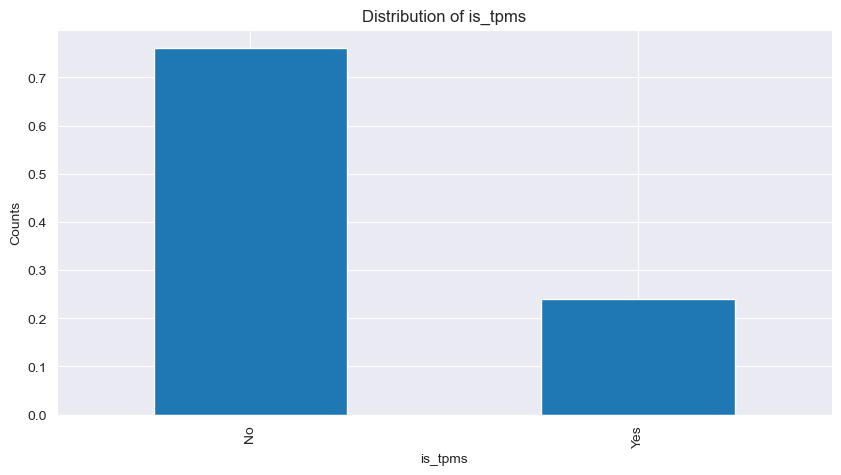

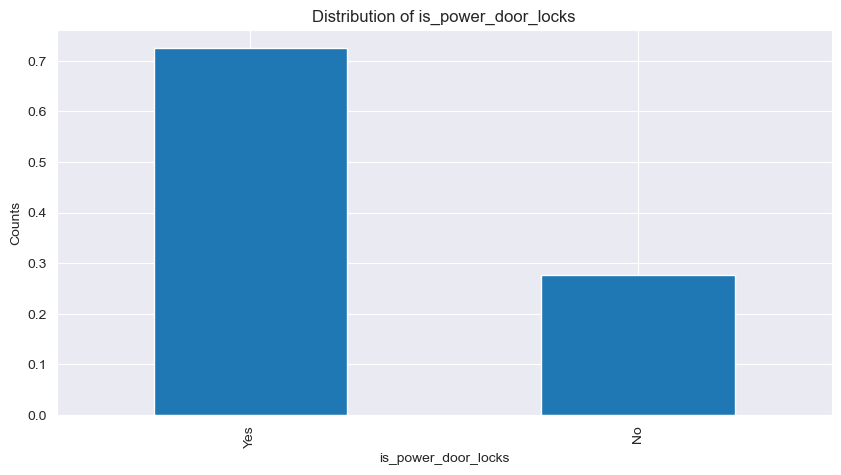

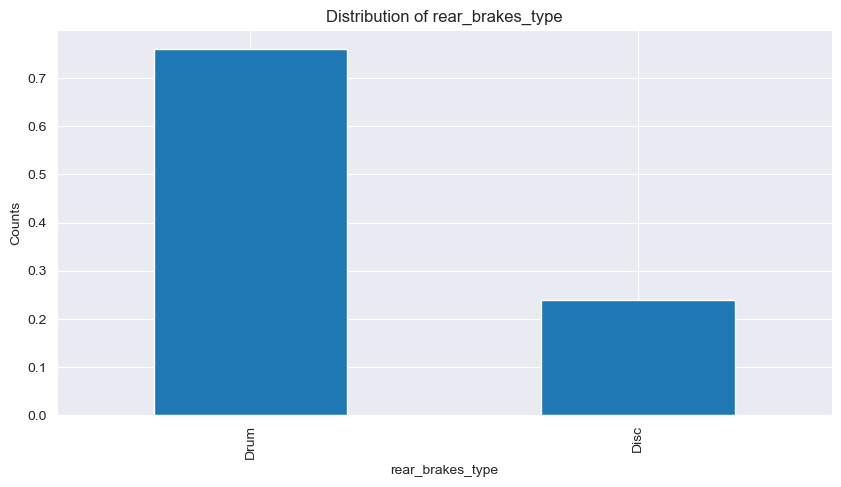

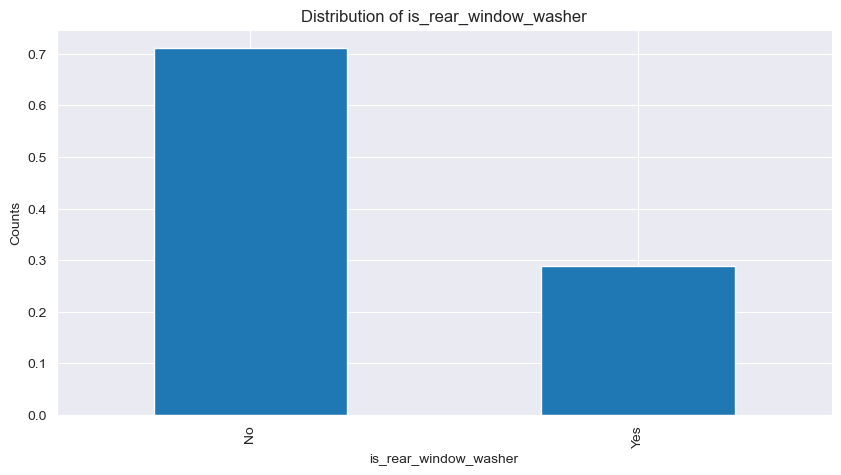

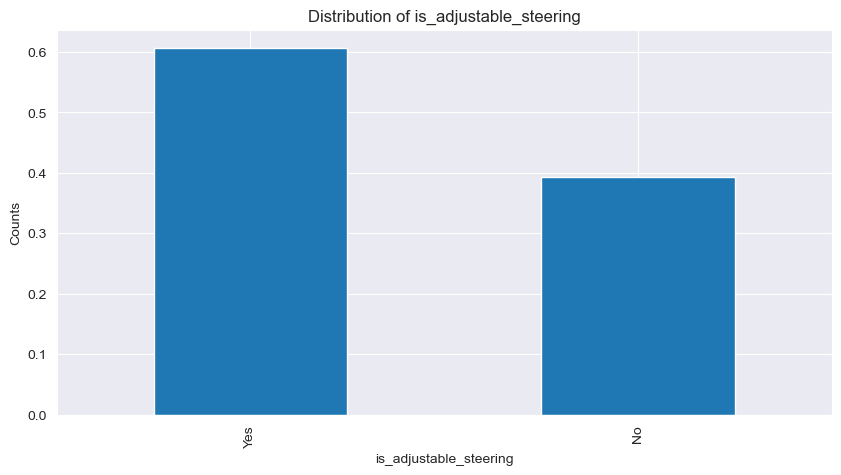

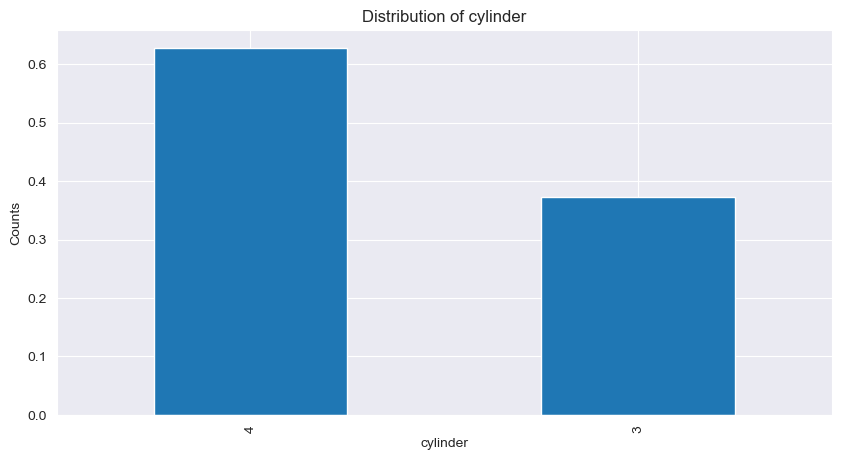

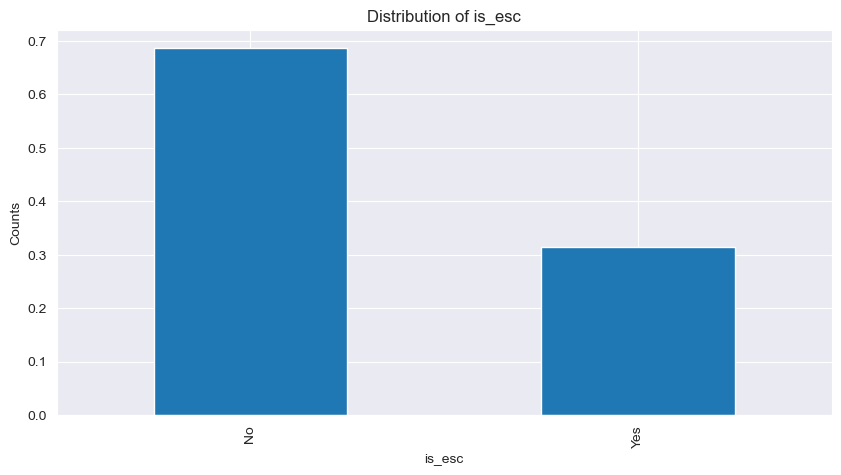

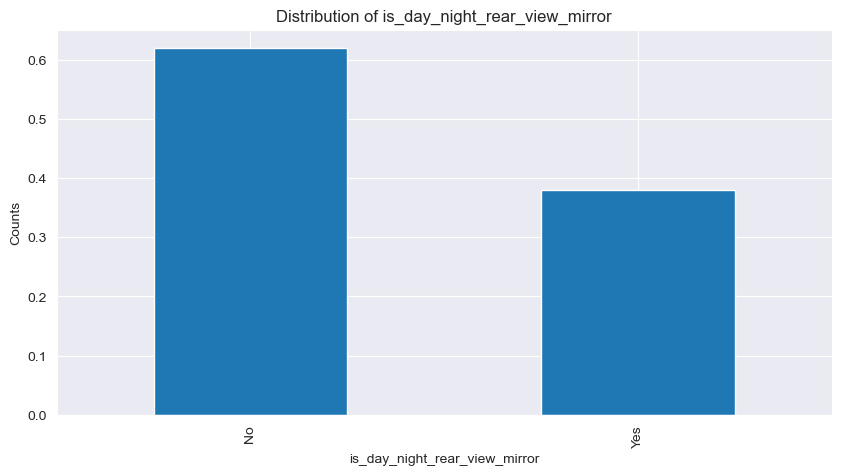

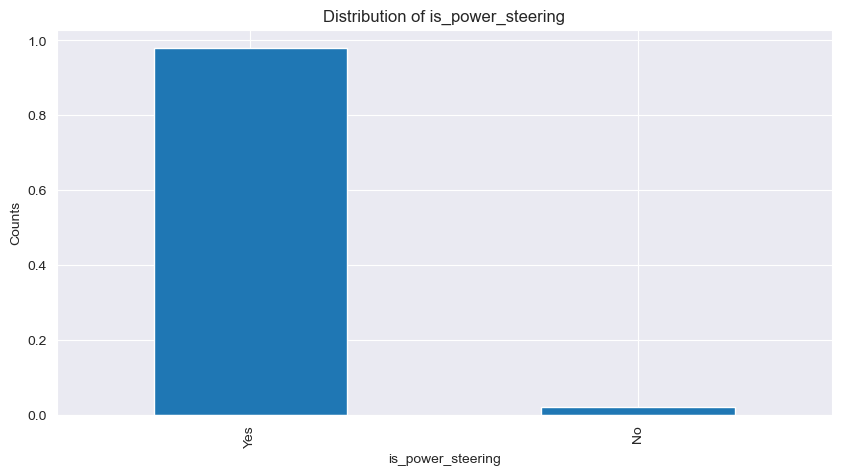

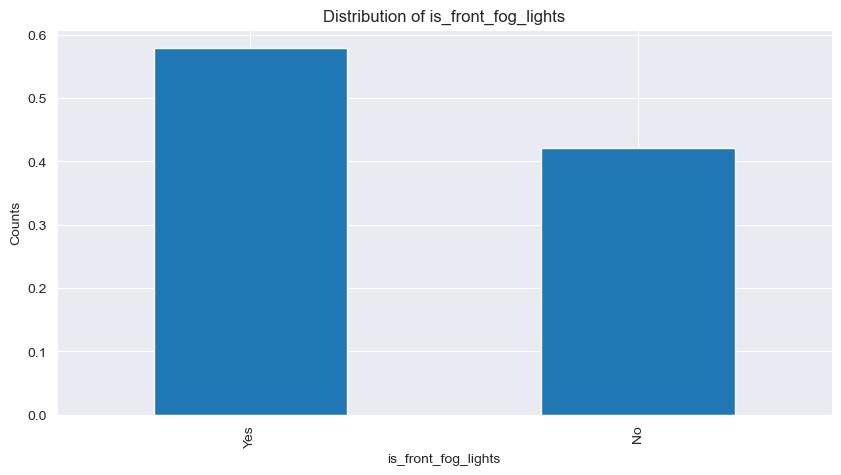

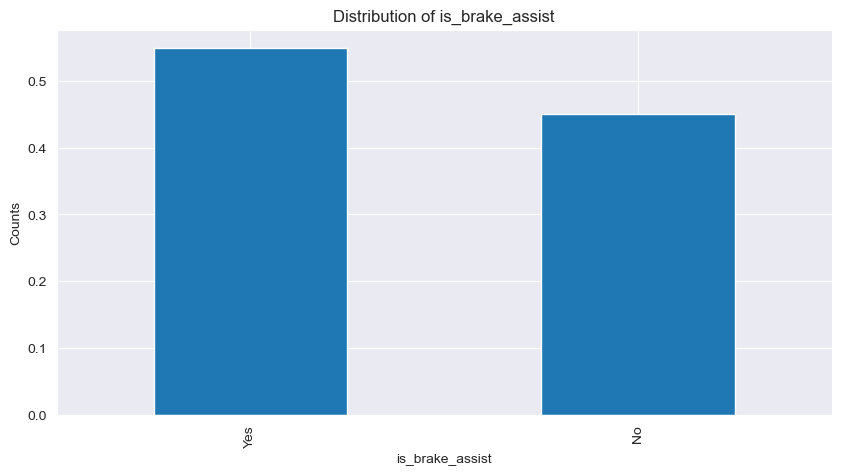

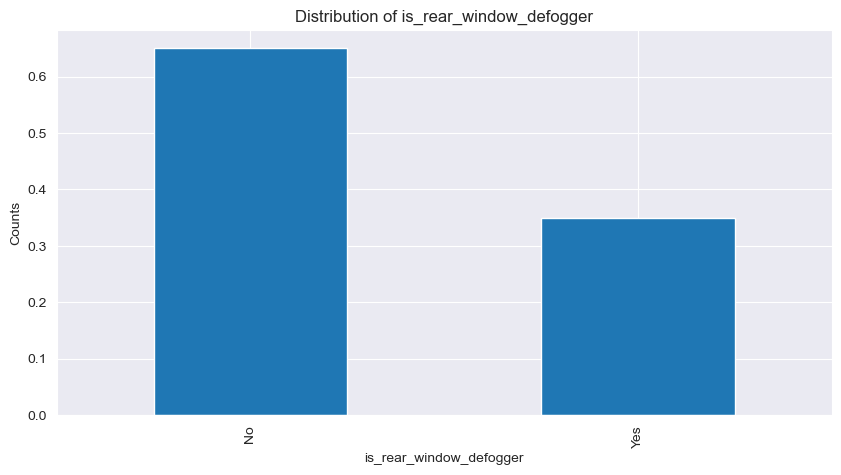

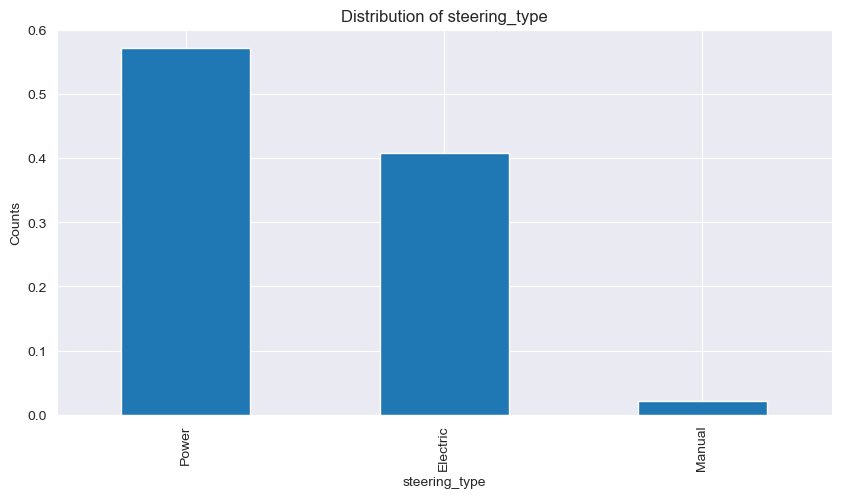

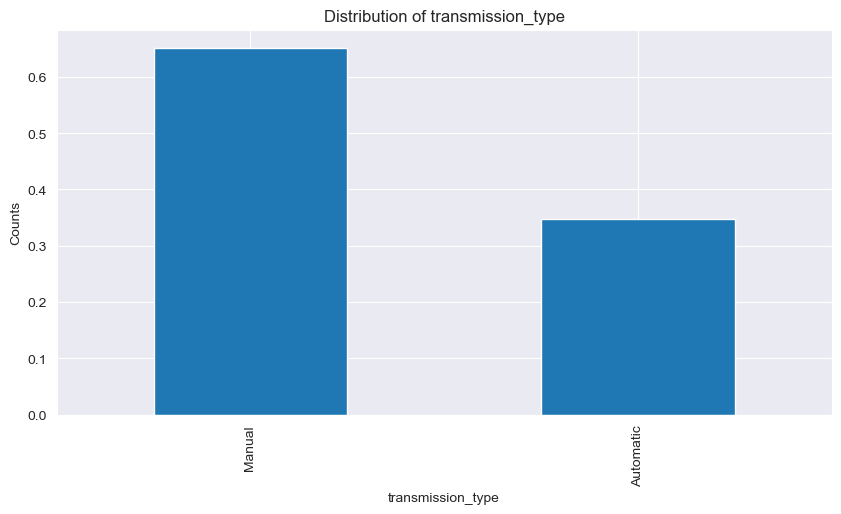

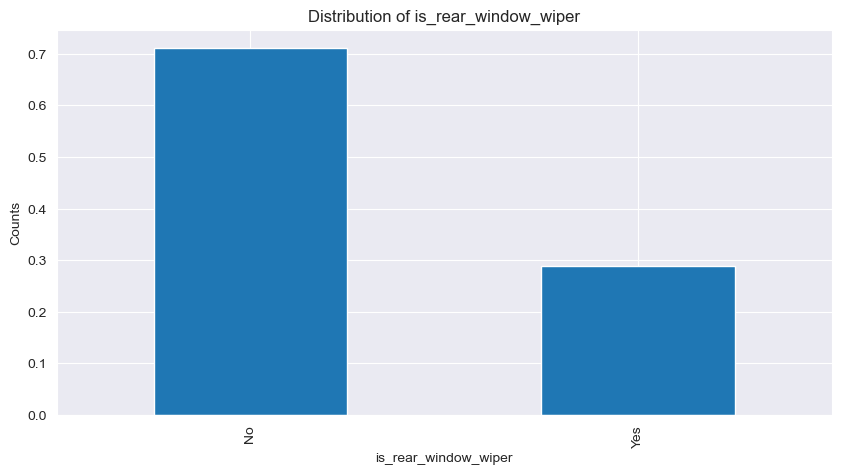

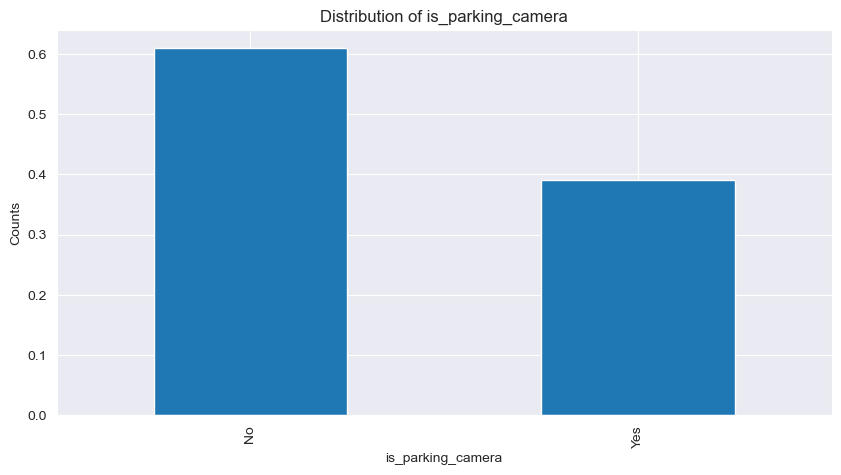

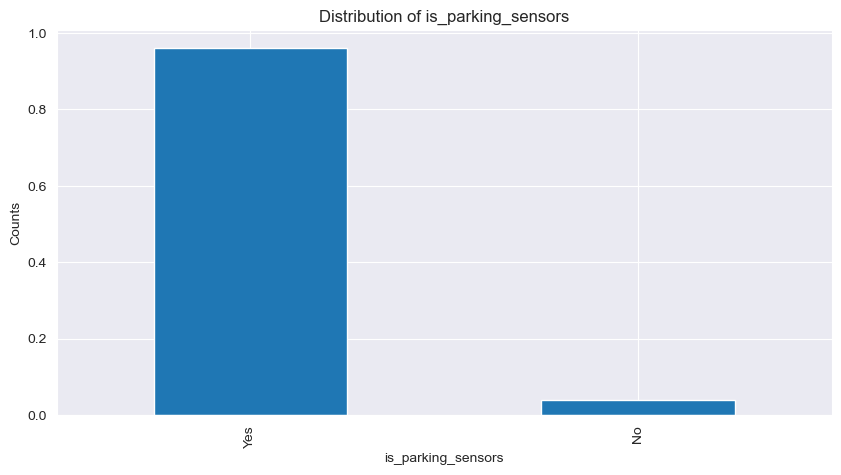

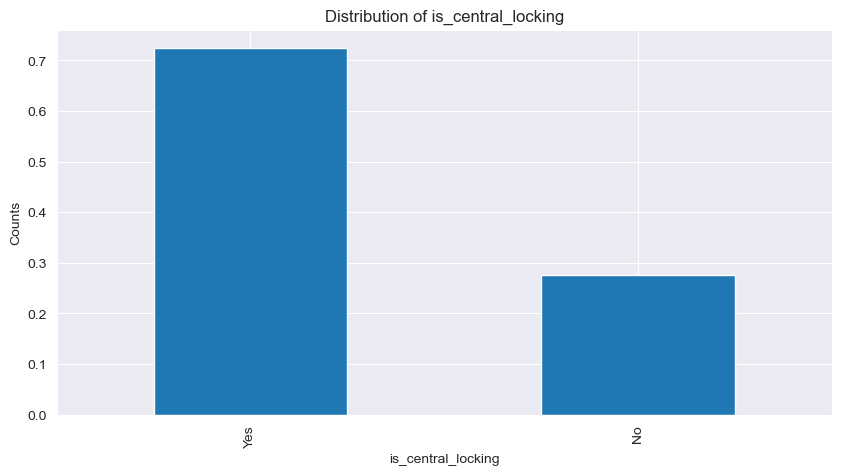

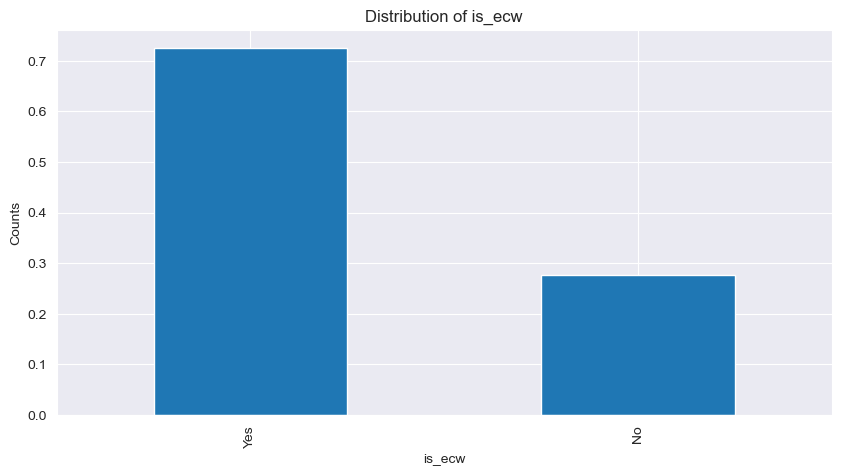

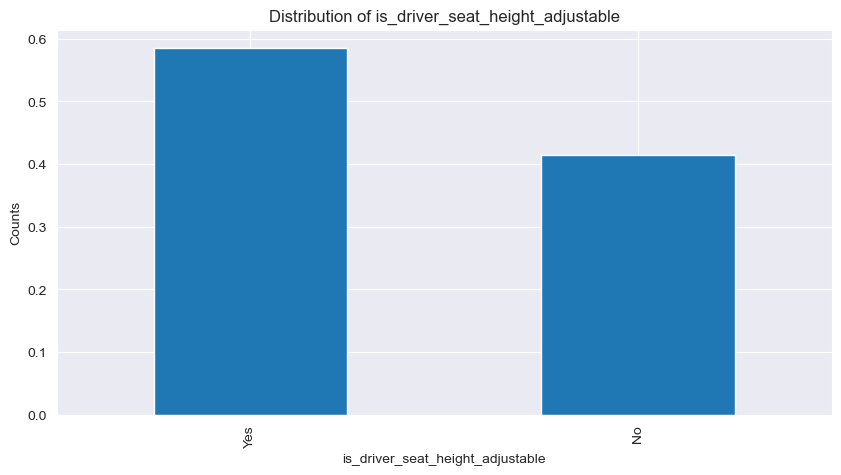

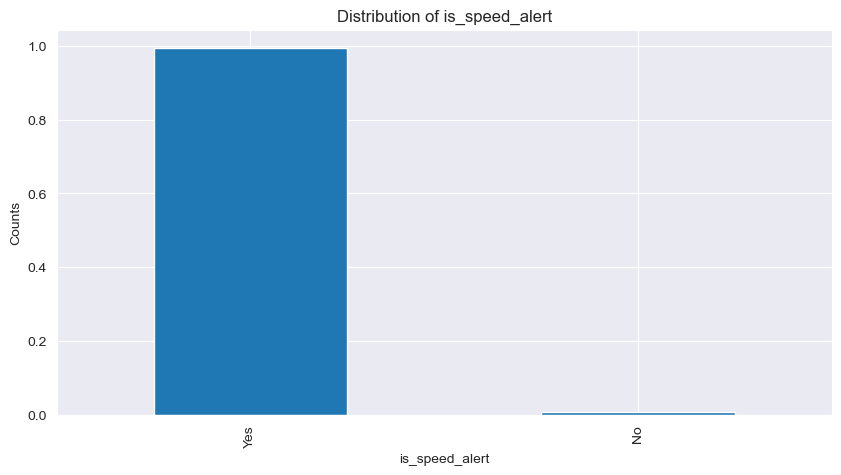

In [51]:
columns_visualize = {
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'rear_brakes_type', 'transmission_type',
    'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert', 'cylinder'
}

def visualize_columns(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 5))
        data[column].value_counts(normalize=True).plot(kind='bar')
        plt.ylabel('Counts')
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')
        plt.show()
visualize_columns(data, columns_visualize)


# Check for Imbalance

0    54844
1     3748
Name: claim_status, dtype: int64


Text(0.5, 1.0, 'Distribution of Claim Status')

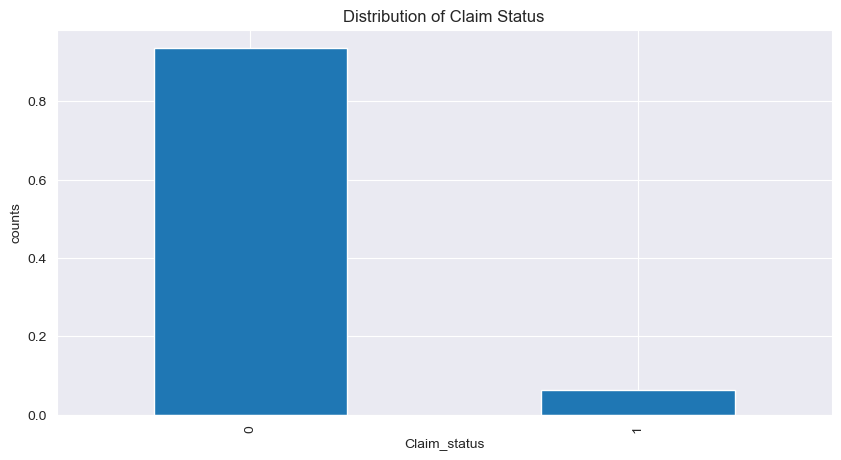

In [52]:
#Check if the predictor class is balanced 
print(data['claim_status'].value_counts())
plt.figure(figsize=(10,5))
data['claim_status'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Claim_status')
plt.title('Distribution of Claim Status')


The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0). This imbalance will be a challenge to address during the model training phase to ensure our model does not become biased toward predicting the majority class.



# Conclusion Categorical Features

-  Most categotical columns have two classes except for a few which we have now binned together
-  Target variable is highly inbalanced and we have to correct that

# continous features

Our main numerical columns include subsciption_lenght,vehicle age and customer age 

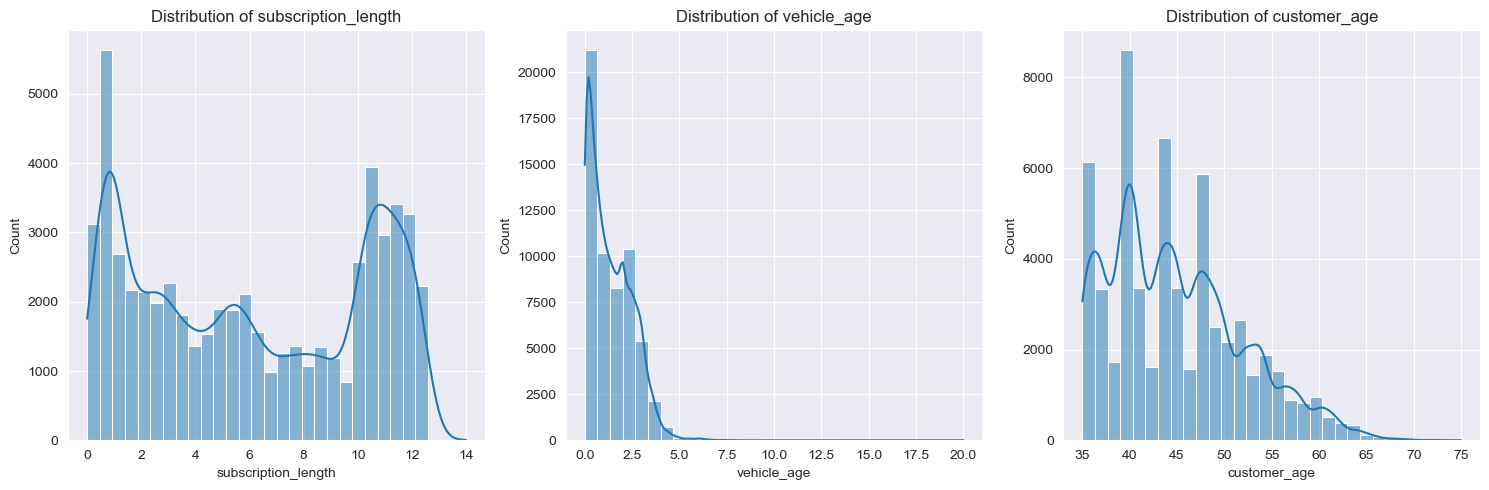

In [53]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Key takes in the numerical data 
-  subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.
- vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset.
- customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.

# Handling Class Imbalance


We will use oversampling to balance the data

In [54]:
from sklearn.utils import resample

# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

0    54844
1    54844
Name: claim_status, dtype: int64

After performing oversampling on the minority class, both classes are balanced with 54,844 entries each. Now, let’s have a look at some key variables to see what the balanced data looks like

In [55]:
oversampled_data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,model_pop,Pop_max_torque,level_max_power,Popular_engine_type,level_displacement,size_tuning_radius,length_cat,size_width,weight_cat,rating_cat
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Popular_model,Popular_max_torque,High_max_power,Most_engine_type,High_displacement,large_tuning_radius,long,wider,heavier,average_rating
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,Unpopular_model,Unpopular_max_torque,Low_max_power,least_engine_type,High_displacement,small_tuning_radius,long,wider,heavy,good_rating
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Popular_model,Popular_max_torque,High_max_power,Most_engine_type,High_displacement,large_tuning_radius,long,wider,heavier,average_rating
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,Popular_model,Popular_max_torque,High_max_power,Most_engine_type,low_displacement,small_tuning_radius,short,wide,heavy,Poor_rating
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,Unpopular_model,Unpopular_max_torque,Low_max_power,least_engine_type,High_displacement,large_tuning_radius,long,wider,heavy,good_rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,POL044783,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,Unpopular_model,Unpopular_max_torque,Low_max_power,least_engine_type,low_displacement,small_tuning_radius,long,wide,heavy,Poor_rating
36093,POL044451,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Popular_model,Popular_max_torque,High_max_power,Most_engine_type,High_displacement,small_tuning_radius,long,wider,heavy,Poor_rating
54154,POL040484,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,...,Popular_model,Popular_max_torque,High_max_power,Most_engine_type,low_displacement,small_tuning_radius,short,wide,heavy,Poor_rating
48891,POL040274,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Popular_model,Popular_max_torque,High_max_power,Most_engine_type,High_displacement,large_tuning_radius,long,wider,heavier,average_rating


In [56]:
oversampled_data.to_csv('new_car_data.csv',index=False)